<a href="https://colab.research.google.com/github/sapna-90/Project_3-EDA/blob/main/NextHikes_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# To load the data
data = pd.read_csv(r"/content/housing_data - NextHikes.csv")

In [ ]:
data.shape

(1460, 81)

In [ ]:
# To clean the data, fill the missing values and remove duplicates if any.
data.head(5)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Alley           1369
MasVnrType       872
GarageYrBlt       81
Electrical         1
KitchenAbvGr       0
                ... 
ExterQual          0
MasVnrArea         0
Exterior2nd        0
Exterior1st        0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Alley'].fillna(data['Alley'].mode(0),inplace =True)
data['MasVnrType'].fillna(data['MasVnrType'].mode(0),inplace =True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(0),inplace =True)
data['Electrical'].fillna(data['Electrical'].mode(0),inplace =True)

In [ ]:
data.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
df = data.drop_duplicates()
df = df.dropna()
print("Data cleaned successfully!")
print(df.info())

Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 1191
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     14 non-null     int64  
 1   MSSubClass     14 non-null     object 
 2   MSZoning       14 non-null     object 
 3   LotFrontage    14 non-null     int64  
 4   LotArea        14 non-null     int64  
 5   Street         14 non-null     object 
 6   Alley          14 non-null     object 
 7   LotShape       14 non-null     object 
 8   LandContour    14 non-null     object 
 9   Utilities      14 non-null     object 
 10  LotConfig      14 non-null     object 
 11  LandSlope      14 non-null     object 
 12  Neighborhood   14 non-null     object 
 13  Condition1     14 non-null     object 
 14  Condition2     14 non-null     object 
 15  BldgType       14 non-null     object 
 16  HouseStyle     14 non-null     object 
 17  OverallQual    14 non-null     i

In [ ]:
df.shape

(14, 81)

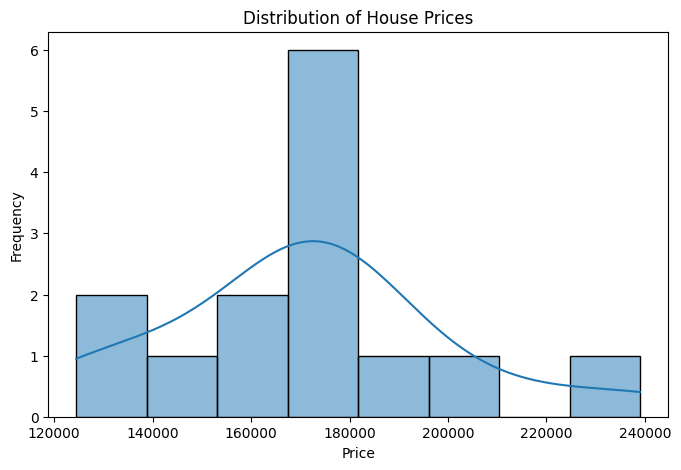

In [ ]:
# Univariate Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

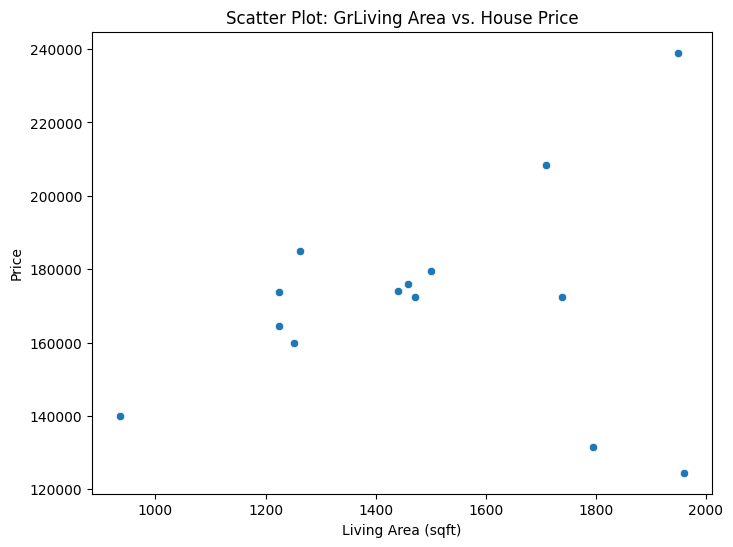

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice',data=df)
plt.title('Scatter Plot: GrLiving Area vs. House Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

<Figure size 600x600 with 0 Axes>

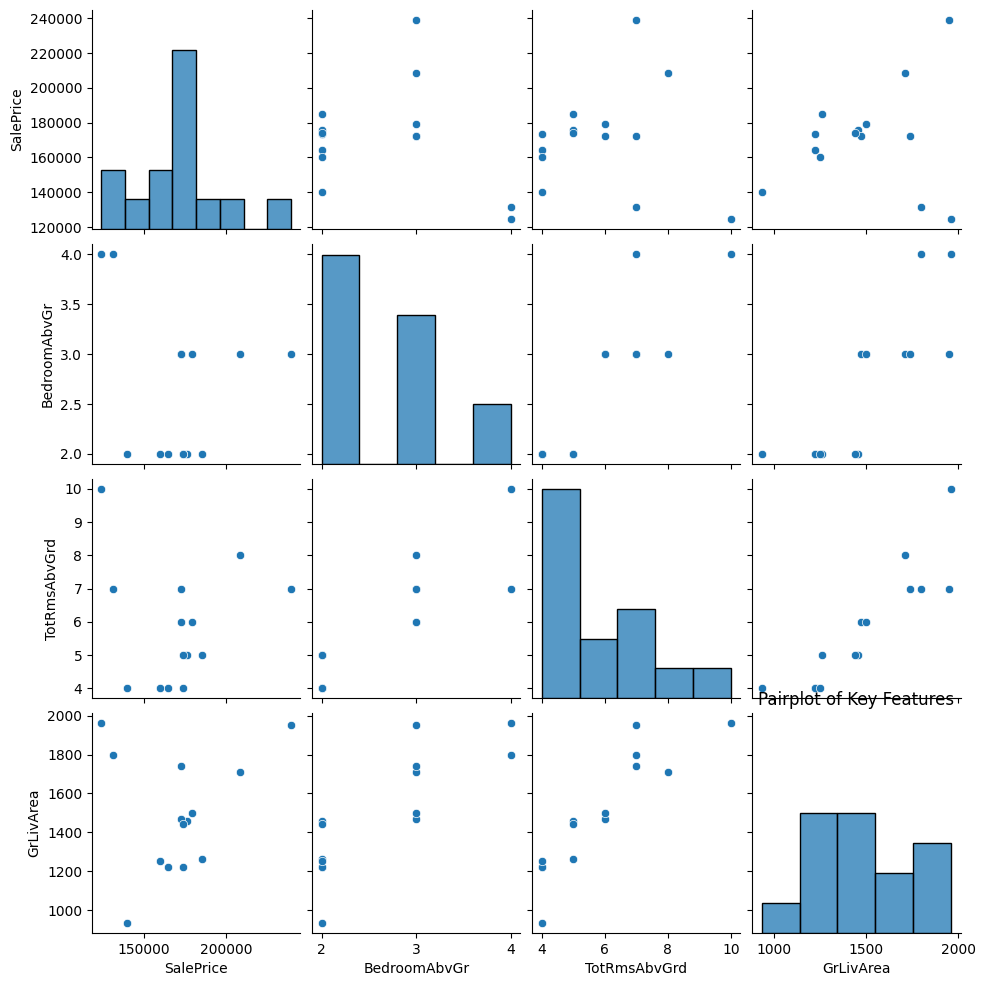

In [ ]:
# Multivariate Analysis
plt.figure(figsize=(6, 6))
sns.pairplot(df, vars=['SalePrice', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GrLivArea'])
plt.title('Pairplot of Key Features')
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.impute import SimpleImputer
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
for col in numerical_cols:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
if len(categorical_cols) > 0:
           df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [ ]:
print(df[numerical_cols])
print(df[categorical_cols])

      Unnamed: 0  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            0.0         65.0   8450.0          7.0          5.0     2003.0   
56          56.0         24.0   2645.0          8.0          5.0     1999.0   
87          87.0         40.0   3951.0          6.0          5.0     2009.0   
115        115.0         34.0   3230.0          6.0          5.0     1999.0   
281        281.0         60.0   7200.0          6.0          5.0     2006.0   
297        297.0         66.0   7399.0          7.0          5.0     1997.0   
505        505.0         60.0   7596.0          5.0          5.0     1952.0   
579        579.0         81.0  12150.0          5.0          5.0     1954.0   
755        755.0         34.0   3230.0          6.0          5.0     1999.0   
758        758.0         24.0   2280.0          7.0          5.0     1999.0   
914        914.0         30.0   3000.0          6.0          5.0     2009.0   
1091      1091.0         24.0   2160.0          7.0 

In [ ]:
df = df[df[numerical_cols].applymap(np.isreal)]

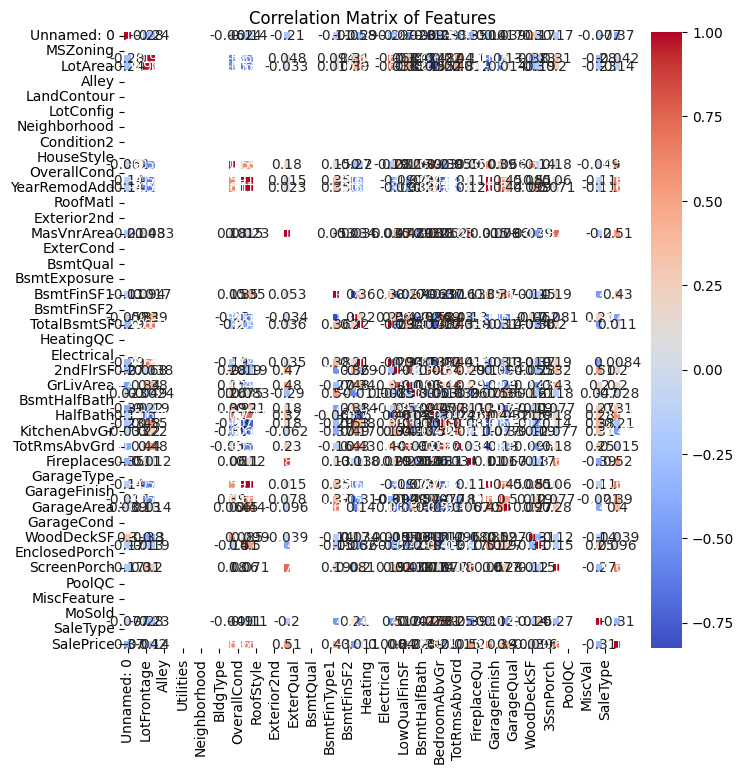

In [ ]:
plt.figure(figsize=(8, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Feature Engineering
# Create new features that capture relevant information for pricing analysis
df['price_per_sqft'] = df['SalePrice'] / df['GrLivArea']
df['age'] = 2024 - df['YrSold']
print(df['price_per_sqft'] , df['age'])

0       121.929825
56       99.194940
87      134.395425
115     120.713306
281     146.592710
297     122.564103
505      63.520408
579      73.259053
755     117.267165
758     119.520320
914     141.938725
1091    127.795527
1129    149.572650
1191    120.749480
Name: price_per_sqft, dtype: float64 0       16.0
56      15.0
87      15.0
115     17.0
281     18.0
297     17.0
505     15.0
579     16.0
755     15.0
758     16.0
914     15.0
1091    16.0
1129    17.0
1191    17.0
Name: age, dtype: float64


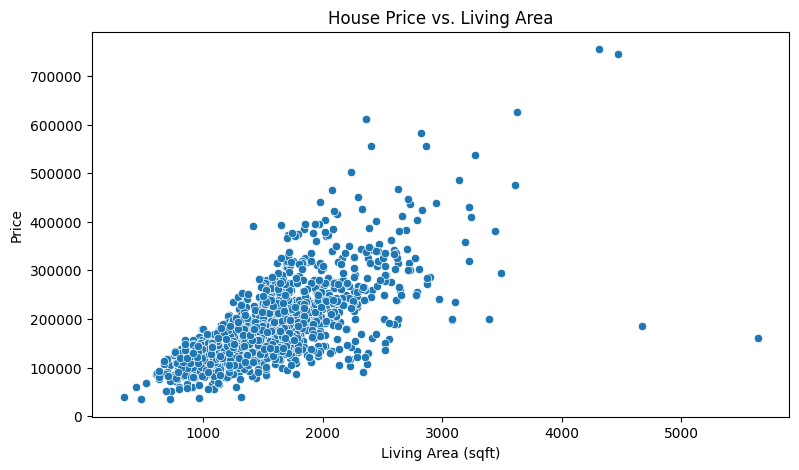

In [29]:
# Feature engineering and size impact
# Further analyze the impact of features and size on house prices
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv(r"/content/housing_data - NextHikes.csv")
plt.figure(figsize=(9,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('House Price vs. Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

In [32]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

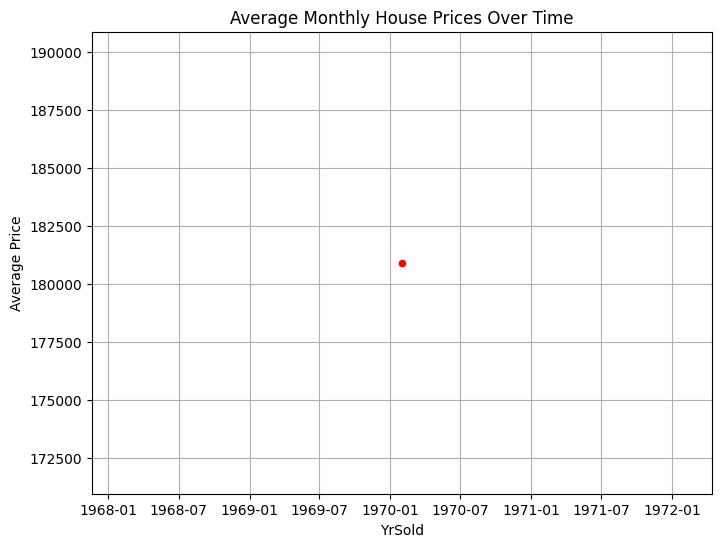

In [60]:
# Market Trends and Historical Pricing
# Analyze historical pricing trends over time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"/content/housing_data - NextHikes.csv")
df['YrSold'] = pd.to_datetime(df['YrSold'], errors='coerce')
df.set_index('YrSold', inplace=True)
monthly_avg_price = df['SalePrice'].resample('M').mean()
plt.figure(figsize=(8, 6))
sns.scatterplot(monthly_avg_price, marker='o', linestyle='-', color='r')
plt.title('Average Monthly House Prices Over Time')
plt.xlabel('YrSold')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [65]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

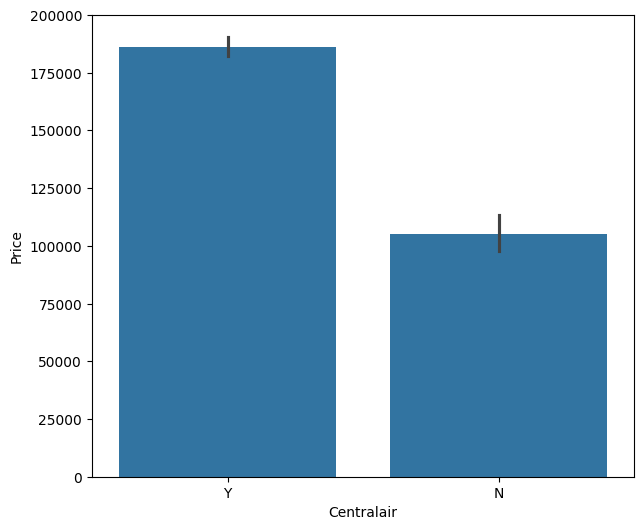

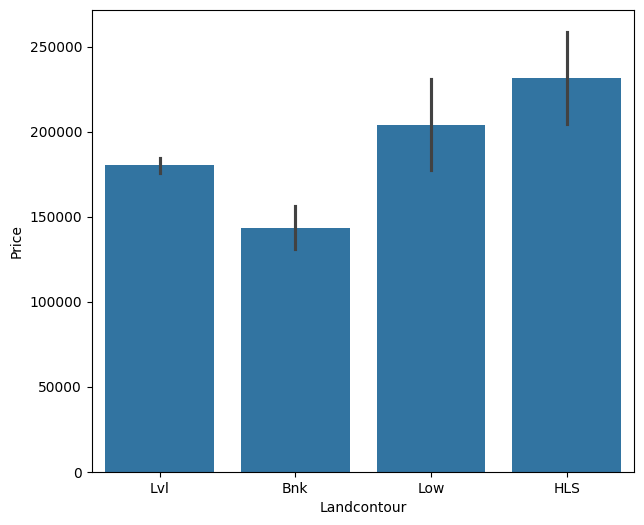

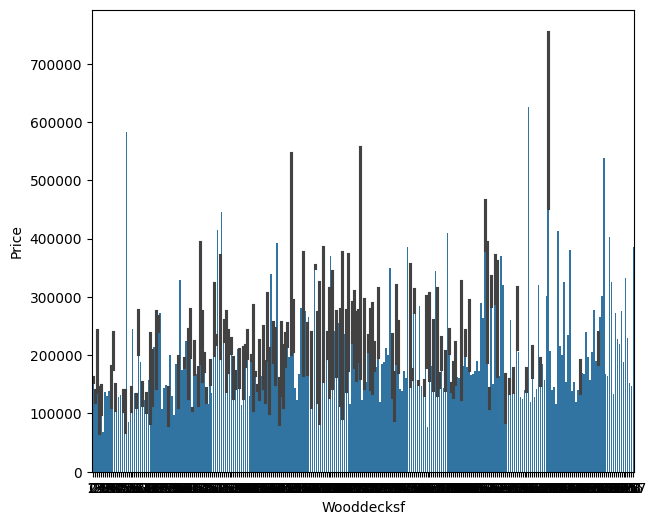

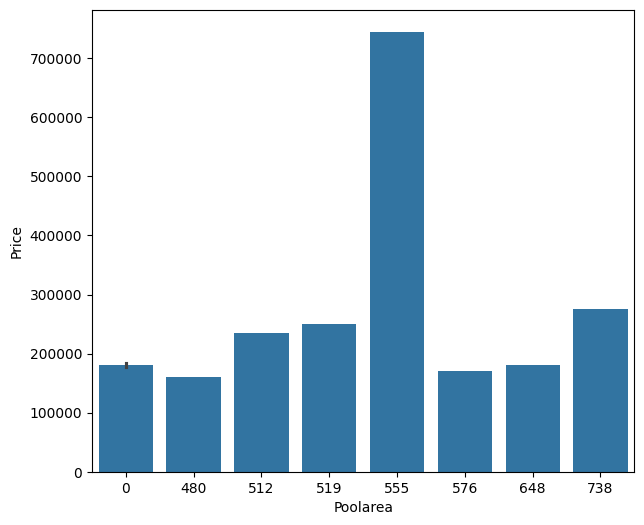

In [74]:
# Customer Preferences and Amenities
# Investigate how customer preferences and amenities impact house prices
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"/content/housing_data - NextHikes.csv")
amenities = ['CentralAir', 'LandContour', 'WoodDeckSF', 'PoolArea']
for amenity in amenities:
    plt.figure(figsize=(7, 6))
    sns.barplot(x=amenity, y='SalePrice', data=df)
    plt.xlabel(amenity.capitalize())
    plt.ylabel('Price')
    plt.show()

In [77]:
df.to_csv('Project_3.csv', index=False)